# Logistic Regression
Statistical method used for classification problems, the goal is to predict the class labels of new dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

# Exploratory Data Analysis(EDA)

In [3]:
X = pd.DataFrame(load_breast_cancer().data)
y = pd.DataFrame(load_breast_cancer().target)

In [4]:
X.head()

0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9    ...        20     21      22      23      24      25      26  \
0  0.07871   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.05667   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.05999   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.09744   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.05883   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       27      28       29  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

In [5]:
y[0].value_counts()

1    357
0    212
Name: 0, dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
0     569 non-null float64
1     569 non-null float64
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
dtypes: float64(30)
memory usage: 133.4 KB


In [8]:
X.describe()

0           1           2            3           4   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               5           6           7           8           9      ...      \
count  569.000000  569.000000  569.000000  569.000000  569.000000     ...       
mean     0.104341    0.088799    0.048919    0.181162    0.062798     ...       
std      0.052813    0.079720    0.038803    0.027414    0.007060     ...       
min      0.019380    0.000000    0.000000    0.106000    0.049960     ...       
25%      0.064920    0.029560    0.020310    0.161900    0.057700     ...       
50%      0.092630    0.061540    0.033500    0.179200    0.061540     ...       
75%      0.130400    0.130700    0.074000    0.195700    0.066120     ...       
max      0.345400    0.426800    0.201200    0.304000    0.097440     ...       

               20          21          22           23          24  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               25          26          27          28          29  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 30 columns]

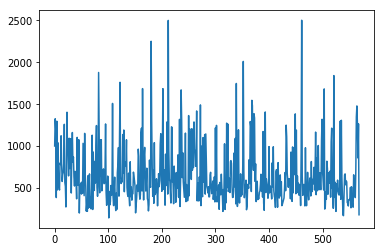

In [22]:
X[3].plot()

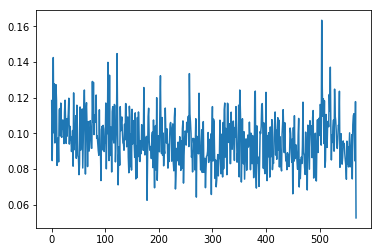

In [23]:
X[4].plot()

In [9]:
X['y'] = y

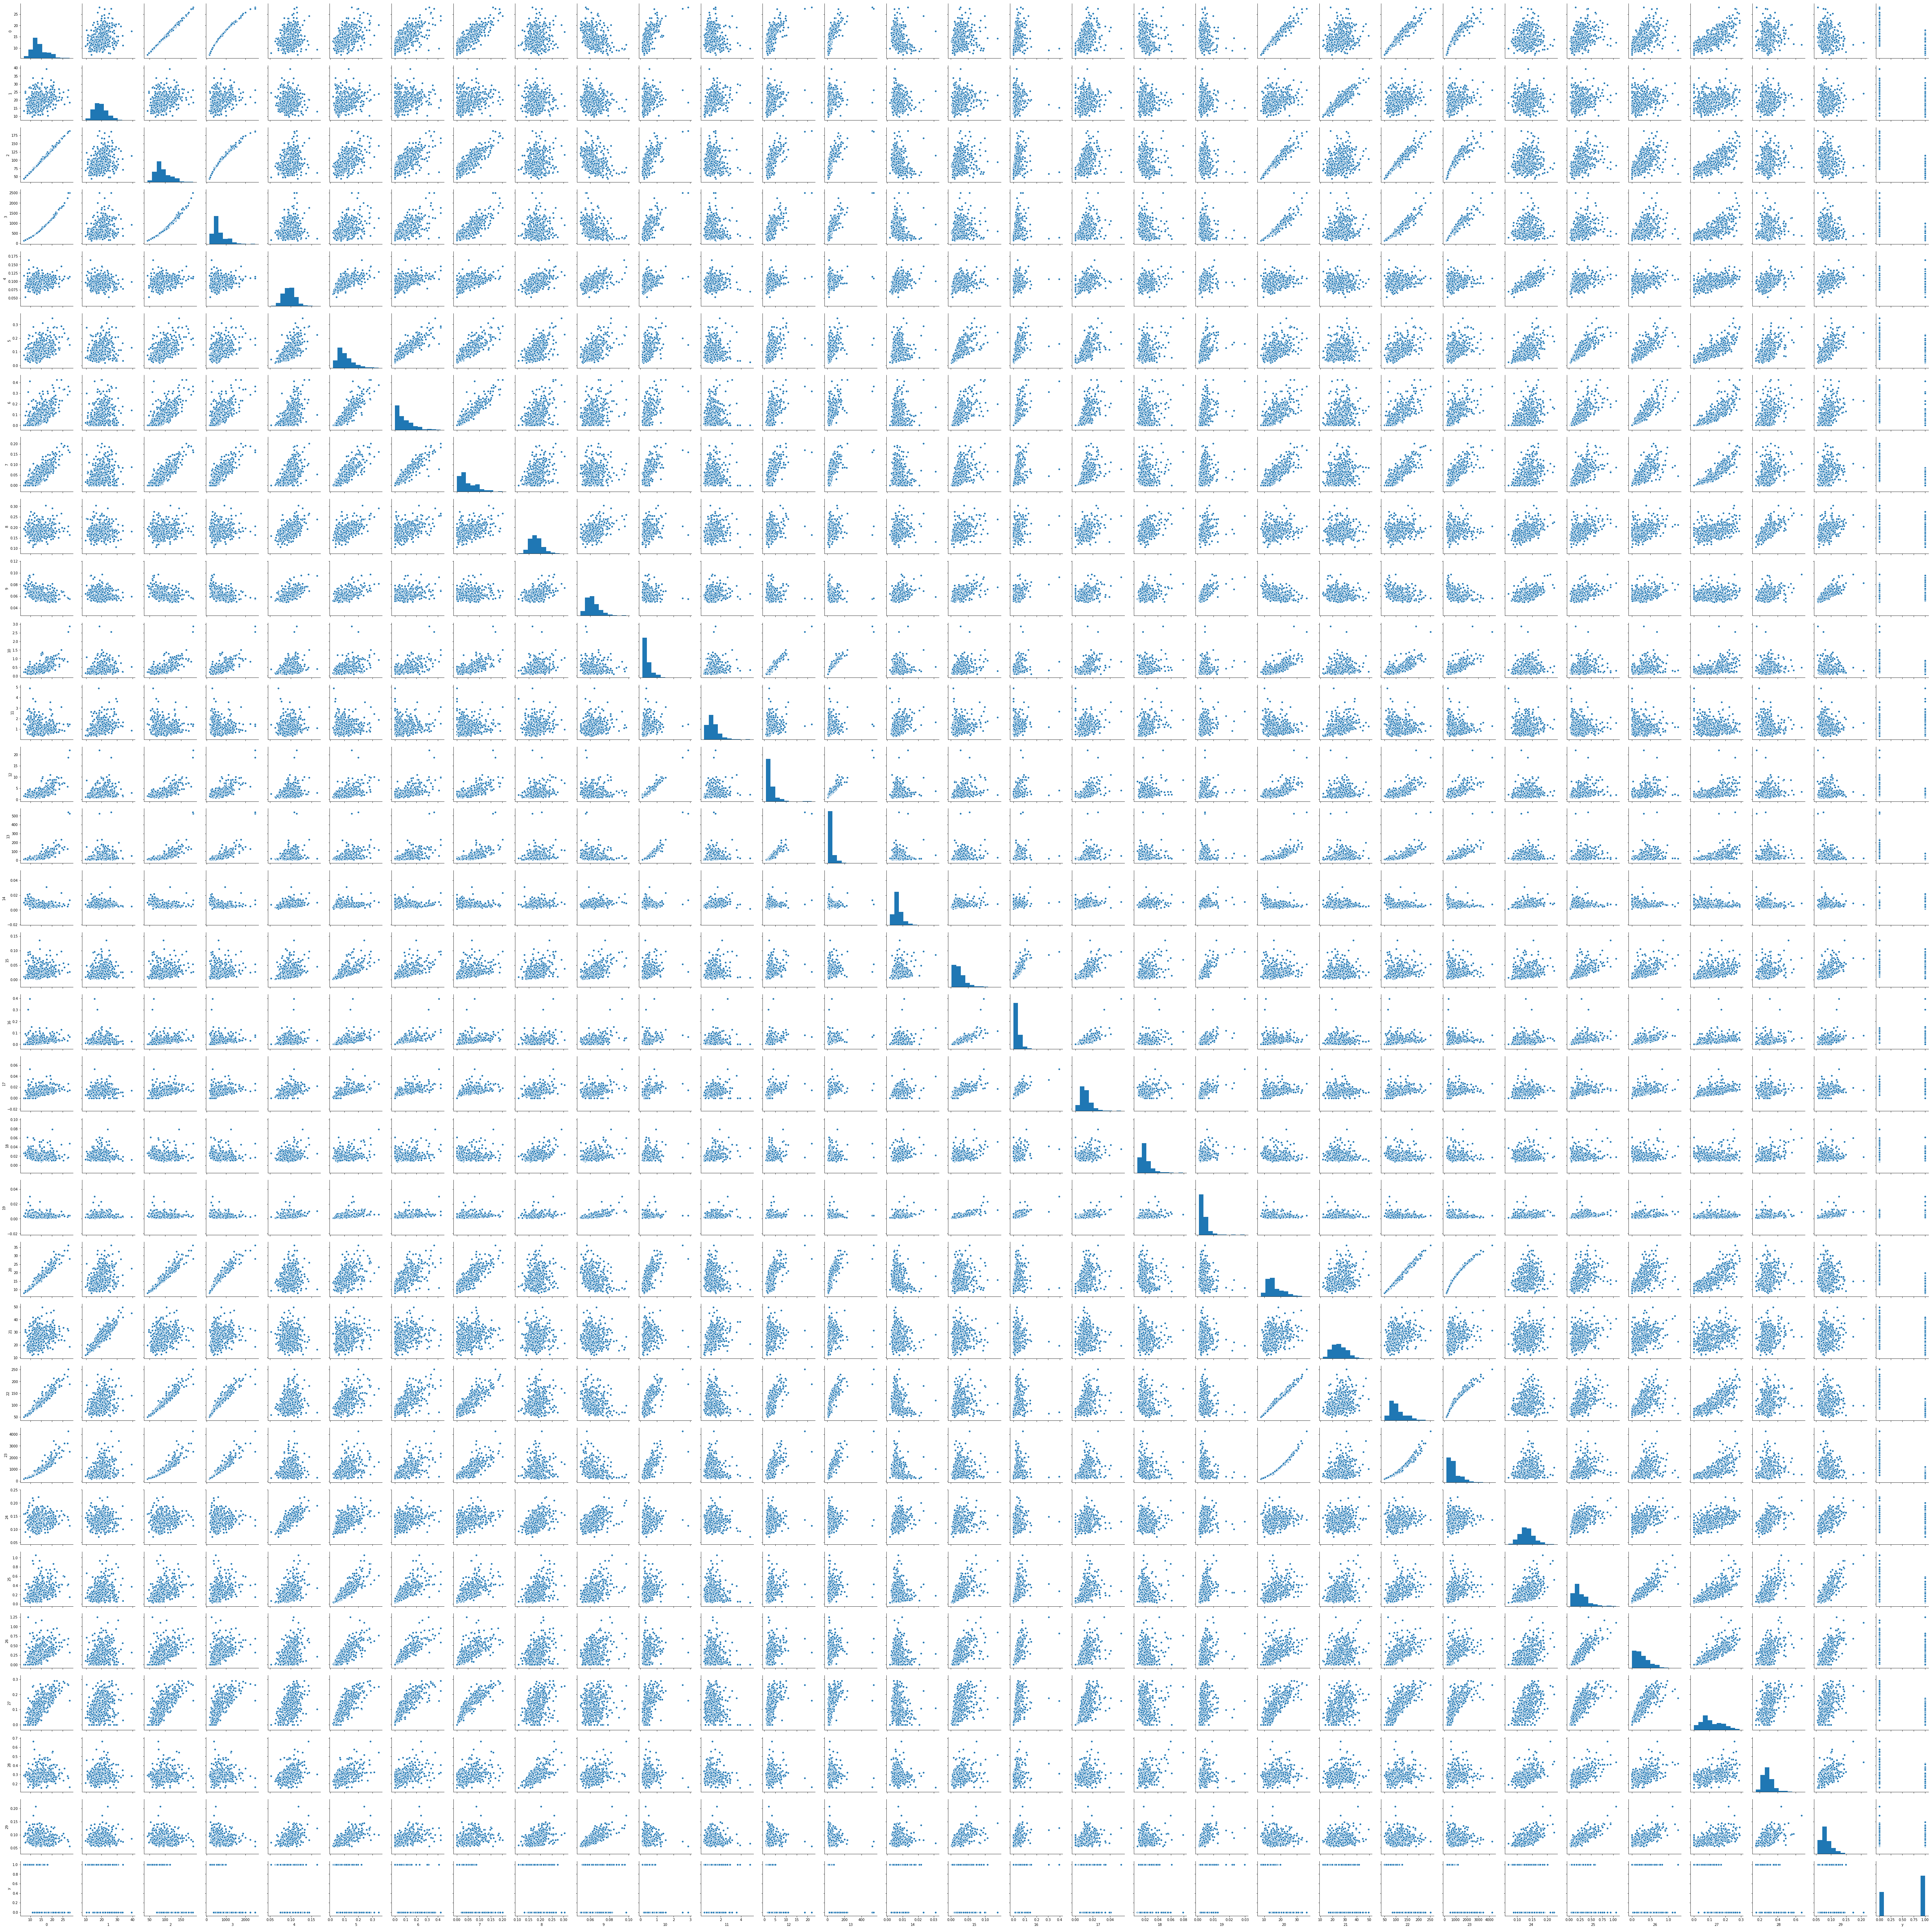

In [10]:
sns.pairplot(X)

In [35]:
X.drop('y', axis=1, inplace=True)

In [36]:
X.head()

0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9    ...        20     21      22      23      24      25      26  \
0  0.07871   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.05667   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.05999   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.09744   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.05883   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       27      28       29  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

# Model
importing the logistic regression model from sklearn

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()  #initializing the model

# Spliting the data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [41]:
print(X_train.shape)
print(X_test .shape)
print(y_train.shape)
print(y_test.shape)

(381, 30)
(188, 30)
(381, 1)
(188, 1)


# Training the Model

In [42]:
clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Prediction

In [43]:
 pred = clf.predict(X_test)

# Evaluation

In [44]:
clf.score(X_train, y_train)

0.95800524934383202

In [45]:
clf.score(X_test, y_test)

0.95744680851063835

# Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or 'classifier') on a set of test data for which the tree values are known.

True positives(TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.

True negative(TN): we predict no, and they don't have the disease.

False positives(FP): we predict yes, but they dont have the disease.(Also known as "Type I error.")

False negative(FN): we predict no,but they actully do have the disease.(Also known as "Type II error.")

This is a list of rates that often computed from a confusion matrix for a binary classifier.
    
    Accuracy: Overall, how often is the classifier correct?
        (TP+TN)/total
    Misclassification Rate: Overall, how often is it wring?
        (FP+FN)/total (equivalent to 1 minus, Accuracy) also known as "Error Rate"
    True Positive Rate: When it's actually yes, how often does it predict yes?
        TP/actual yes, also known as "Sensitivity" or "Recall"
    False Positive Rate: when it's actually no, how often does it predict yes?
        FP/actual no
    Specificity: when it's actually no, how often does it predict no?
        TN/actual no (equivalent to 1 minus, False Positive Rate)
    Precision: When it predicts yes, how often is it correct?
        TP/predicted yes
    Prevalence: How often does the yes condition actually occur in our sample?
        actual yes/total

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 63,   4],
       [  4, 117]], dtype=int64)

# Trying Different Value of Parameter C
This Parameter determines the strength of <b>regularization.</b>The higher values of C correspond to less regularization. In simple words, when we use high value
for the parameter C, the logistic regression try to fit the training set as best as possible. This may result in variance(overfiting) problem, i.e the model will
perform good with training dataset but not with test set.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model

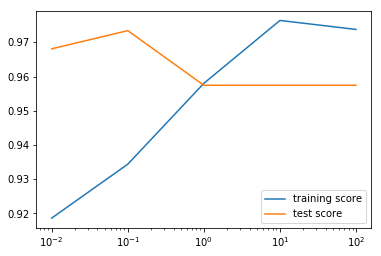

In [48]:
c = [0.01, 0.1, 1, 10, 100]
test_score = []
train_score = []
for i in c:
    clf = LogisticRegression(C=i)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

plt.plot(c, train_score, label = 'training score')
plt.plot(c, test_score, label = 'test score')
plt.xscale('log')
plt.legend()